Mesure de constante d'acidité

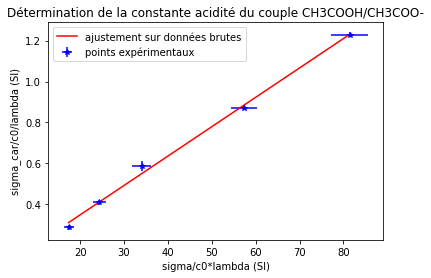


Moyenne des ordonnées à l'origine obtenue par tirage aléatoire = 0.064 mol.m^-3

Moyenne des coef direct obtenue par tirage aléatoire = 0.014 mol.m^-3

Écart-type pour d0 = 0.034 mol.m^-3
Écart-type pour coef direct = 0.001 mol.m^-3



In [17]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Évaluation des incertitudes-types pour les paramètres issus d'un ajustement affine'
Écrit par Timothée de Guillebon, et largement adapté par Ladislas Wierzchalek.
"""
import random as rd
import numpy as np
from math import *
import matplotlib.pyplot as plt


# Données expérimentales avec incertitudes :

3.91e-3

c0=np.array([0.1e3,0.01e3,0.05e3,0.005e3,0.02e3])
sigma=np.array([0.0480,0.01604,0.03408,0.01125,0.02300])

u_c0=c0*np.sqrt((0.01/0.2)**2+(0.03/10)**2+(0.1/100)**2)
u_sigma=np.array([0.0005,0.0005,0.0005,0.0005,0.001])

x=(c0*39.08e-3)/sigma
y=sigma/(39.08e-3)


u_x=x*np.sqrt((u_c0*u_c0/(c0*c0))+(u_sigma*u_sigma/(sigma*sigma)))
u_y=u_sigma/(39.08e-3)



           
                

# Définition de la droite de régression pour définir les 2 points extrêmes de l'abcisse
coef_brut,y0_brut=np.polyfit(x,y,1)   
y_fit=np.linspace(min(x),max(x),2) 
                 
#Tracé du graphique expérimental avec incertitudes et de la régression

plt.figure(2)
plt.plot(y_fit,y0_brut+coef_brut*y_fit,'r',label='ajustement sur données brutes')
plt.errorbar(x,y,xerr=u_x,yerr=u_y,fmt='b*',label='points expérimentaux')
plt.legend(loc='upper left')
plt.title("Détermination de la constante acidité du couple CH3COOH/CH3COO-")
plt.xlabel('sigma/c0*lambda (SI)')
plt.ylabel('sigma_car/c0/lambda (SI)')
plt.show()

# Nombre de tirages Monte-Carlo

N = 5000 # 50000 est très grand, 1000 suffit

# Création des listes 

P=len(y)
y0=[]
coef=[]
tirage_x_temp=np.zeros_like(y) #créer une liste de la même taille que la liste indice. Liste qui reçoit les valeurs des tirages de la valeur de 1/lambda^2
tirage_y_temp=np.zeros_like(y) #liste des valeurs tirés pour l'indice
tirage_y=np.zeros((N,P)) # on garde en mémoire les listes qu'on tire
tirage_x=np.zeros((N,P)) # on garde en mémoire les listes qu'on tire 
                 
                 
                 
for j in range(0,N):
    
    for i in range(0,P):
       # tirage_y_temp[i]=y[i]+u_y[i]*rd.gauss(0,1)
        tirage_y_temp[i]=y[i]+u_y[i]*np.sqrt(3)*np.random.uniform(-1,1)
        tirage_x_temp[i]=x[i]+u_x[i]*rd.gauss(0,1)
        tirage_y[j,i]=tirage_y_temp[i]
        tirage_x[j,i]=tirage_x_temp[i]
    p=np.polyfit(tirage_x_temp,tirage_y_temp,1)
    y0.append(p[1])
    coef.append(p[0])
        
u_y0=np.std(y0,ddof=1) #Means Delta Degrees of Freedom. The divisor used in calculations is N - ddof, where N represents the number of elements. By default ddof is zero.
u_coef=np.std(coef,ddof=1)

                               

                 
# Plot pour observer le tirage des indices pour un point du graphique (le 4e)

#plt.figure(0)
#plt.hist(tirage_y[:,2],bins='rice') 
#plt.title('Hist des tirages de distance pour d = '+format(y[2])+' m')
#plt.xlabel('distance(m)')
#plt.ylabel('Occurences')

# Plot pour observer le tirage de l'inverse 1/Lambda^2 pour un point du graphique (le 4e)

#plt.figure(1)
#plt.hist(tirage_x[:,2],bins='rice')
#plt.title('Hist des tirages de temps autour de t = '+format(x[2])+' m^2')
#plt.xlabel('temps(s)')
#plt.ylabel('Occurences')



#plt.figure(3)
#plt.hist([y0,y0_brut],bins='rice',label=['issu des tirages','ajustement brut'])
#plt.vlines(y0_brut,0,plt.ylim()[1],colors='C1')
#plt.legend(loc='upper right')
#plt.title('Histrogramme des ordonnées à origine')
#plt.xlabel('ordonnée à origine (m)')
#plt.ylabel('Occurences')

#plt.figure(4)
#plt.hist([coef,coef_brut],bins = 'rice',label=['issu des tirages','ajustement brut'])
#plt.vlines(coef_brut,0,plt.ylim()[1],colors='C1')
#plt.title('Histogramme des coefficients directeurs')
#plt.legend(loc='upper right')
#plt.xlabel('coef (m.s^-1)')
#plt.ylabel('Occurences')



print()
print("Moyenne des ordonnées à l'origine obtenue par tirage aléatoire = {:.3f} ".format(np.mean(y0))+'mol.m^-3')
#print("À comparer à la valeur obtenue avec le fit initial = {:.3f}".format(y0_brut)+'m')
print()

print("Moyenne des coef direct obtenue par tirage aléatoire = {:.3f} ".format(np.mean(coef))+"mol.m^-3")
#print("À comparer à la valeur obtenue avec le fit initial = {:.3f}".format(coef_brut)+"m.s^-1")
print()
# Calcul des incertitudes-types sur 
print("Écart-type pour d0 = {:.3f} ".format(np.std(y0,ddof=1))+"mol.m^-3")
print("Écart-type pour coef direct = {:.3f} ".format(np.std(coef,ddof=1))+"mol.m^-3")

# Affichage du résultat de la simulation :
print()

#print('Finalement, d0 = {:.3f}'.format(y0_brut)+' ± {:.3f}'.format(np.std(y0,ddof=1))+'m'' et coef = {:.3f}'.format(coef_brut)+' ± {:.3f}'.format(np.std(coef,ddof=1))+' m.s^-1')